### Часть 1

In [2]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install seaborn

plt.style.use('seaborn-whitegrid')


In [90]:
data = pd.read_csv('cons.csv', index_col=0)

In [68]:
dat1 = data.drop(['Конcенсус (среднесрочный)','Конcенсус (долгосрочный)'], axis=1)

dat1.loc[:'2026',"Лукойл - Эволюция (12/2021)":] = dat1.loc[:'2030',"Лукойл - Эволюция (12/2021)":].interpolate().loc[:'2026',:]

# dat1
#  

cons_sred = dat1.loc['2021':'2026',:].mean(axis=1)


dat2 = dat1.loc['2021':'2050',"OPEC (09/2021, для 2022 года: 05/2022)":].drop('Факт',axis=1).interpolate()

cons_long = dat1.iloc[4:,:2].join(dat2).mean(axis=1)

conses = pd.DataFrame([cons_sred,cons_long]).T
conses.columns = ['Конcенсус (среднесрочный)','Конcенсус (долгосрочный)']

dat1.join(conses).to_csv('cons.csv')

In [71]:
# data.columns

In [13]:
# d1 = data.loc[:,['EIA (01/2022)', 'IEA (11/2021)', 'OECD (09/2021)', 'Конcенсус-прогноз',
#        'Факт']]
# d1

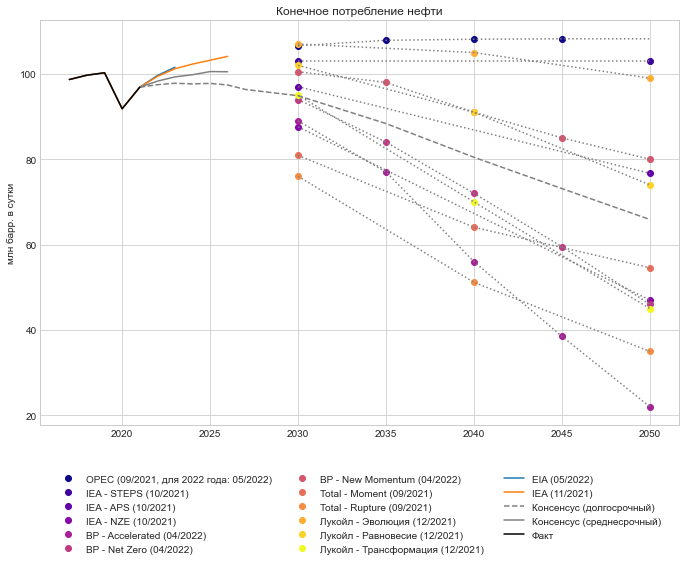

In [92]:


d2 = data.loc['2030':,['OPEC (09/2021, для 2022 года: 05/2022)',
     'IEA - STEPS (10/2021)', 'IEA - APS (10/2021)',
       'IEA - NZE (10/2021)', 'BP - Accelerated (04/2022)', 'BP - Net Zero (04/2022)',
       'BP - New Momentum (04/2022)', 'Total - Moment (09/2021)',
       'Total - Rupture (09/2021)', 'Лукойл - Эволюция (12/2021)',
       'Лукойл - Равновесие (12/2021)', 'Лукойл - Трансформация (12/2021)']]



d2.plot(linestyle='', marker='o', cmap='plasma', figsize=(10, 8))

d1 = data.loc[:,['EIA (05/2022)', 'IEA (11/2021)',         
                   'Конcенсус (долгосрочный)', 'Конcенсус (среднесрочный)',
                 'Факт']]

# d1.iloc[:,2:4] = d1.iloc[:,2:4].interpolate()
# d1.plot(legend=None)
# d1.plot(cmap='plasma')


plt.plot(d1.iloc[:,:2],linestyle='-')




plt.plot(data.loc[:,['Конcенсус (долгосрочный)']], color='gray', linestyle='--')
plt.plot(data.loc[:,['Конcенсус (среднесрочный)']], color='gray')
plt.plot(data.loc[:,['Факт']], color='black')


# d1.plot(cmap='plasma')
# plt.set_cmap("Greens")

# plt.legend(None)

# plt.legend(loc=None)
# 
plt.plot(d2.interpolate(), linestyle='dotted', color='grey')


plt.title('Конечное потребление нефти')


plt.ylabel('млн барр. в сутки')
plt.xlabel('')

plt.legend(pd.concat([d2, d1], axis=1).columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

plt.tight_layout()

plt.savefig('p7.png', dpi=300)

In [78]:
data  = pd.read_csv('prices.csv', index_col=0)

In [44]:
dat1 = data.drop(['OECD (12/2021)',
'ЦБ РФ - Urals (базовый, 10/2021)',
'МЭР РФ - Urals (долгосрочный, 2018)  ',
'NEB - Current Policies (12/2021)',
'NEB - Evolving Policies (12/2021)',
'EIA -  Reference case (03/2022)',
'EIA - High economic growth (03/2022)',
'EIA - Low economic growth (03/2022)',
'EIA - High oil and gas supply (03/2022)',
'EIA - Low oil and gas supply (03/2022)',
'EIA - High renewables cost (03/2022)',
'EIA - Low renewables cost (03/2022)',
'EIA - No Interstate Pipeline Builds (03/2022)',
'Факт',
'Факт -  Urals'], axis=1).copy()

cons_krat = dat1.loc[2021:2023,:].mean(axis=1)

dat2 = data.drop(['МЭР РФ - Urals (долгосрочный, 2018)  ',
'Факт',
'Факт -  Urals'], axis=1).copy()

cons_sred = dat2.loc[2021:2025,:].mean(axis=1)
cons_long = dat2.loc[2021:,:].mean(axis=1)

# cons_long

conses = pd.DataFrame([cons_krat, cons_sred,cons_long]).T
conses.columns = ['Конcенсус (краткосрочный)','Конcенсус (среднесрочный)','Конcенсус (долгосрочный)']


data.join(conses).to_csv('prices.csv')

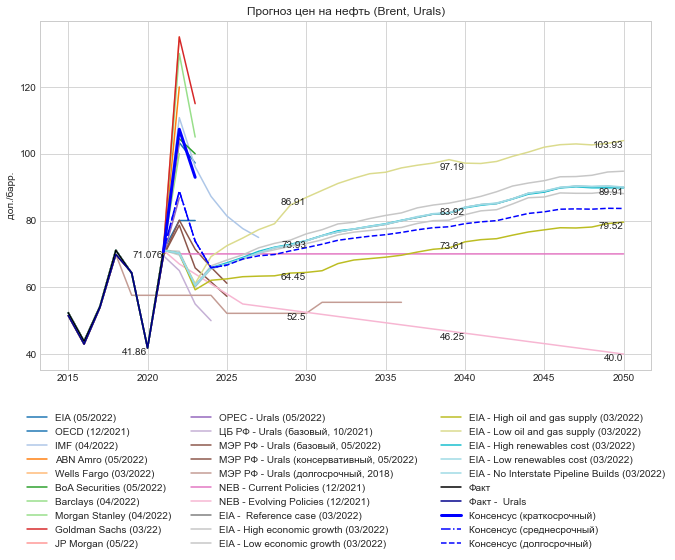

In [89]:
d1 = data.iloc[:,:-5]
# d1.iloc[:,-1]=d1.iloc[:,-1].interpolate()
d1.plot(cmap='tab20', figsize=(15/1.5, 12/1.5))

plt.plot(data.loc[:,['Факт']], color='black')
plt.plot(data.loc[:,['Факт -  Urals']], color='darkblue')
plt.plot(data.loc[:,['Конcенсус (краткосрочный)']], color='blue', linewidth=3)
plt.plot(data.loc[:,['Конcенсус (среднесрочный)']], color='blue', linestyle='dashdot', linewidth=1.5)
plt.plot(data.loc[:,['Конcенсус (долгосрочный)']], color='blue', linestyle='--', linewidth=1.5)
plt.title('Прогноз цен на нефть (Brent, Urals)')

plt.ylabel('дол./барр.')
plt.xlabel('')

yr = 2020
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

yr = 2021
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

nnn=['EIA - High oil and gas supply (03/2022)',
       'EIA - Low oil and gas supply (03/2022)', 
     'EIA -  Reference case (03/2022)',
    'NEB - Evolving Policies (12/2021)']

for yr in [2030,2040,2050]:
    for nam in nnn:
        plt.text(yr, d1[nam][yr], np.round(d1[nam][yr],2), verticalalignment='top', horizontalalignment='right')

plt.legend(data.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

plt.tight_layout()

plt.savefig('p13.png', dpi=300)

In [ ]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

d1 = data.iloc[:,:-4]
d1.iloc[:,-1]=d1.iloc[:,-1].interpolate()
d1.plot(cmap='plasma')
plt.plot(data.loc[:,['Конcенсус - краткосрочный']], color='gray')
plt.plot(data.loc[:,['Конcенсус - долгосрочный']], color='gray', linestyle='--')
plt.plot(data.loc[:,['Факт']], color='black')
plt.plot(data.loc[:,['Факт -  Urals']], color='darkblue')



# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
# d1.plot(legend=None)

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 
plt.title('Прогноз цен на нефть (Brent, Urals)')

plt.ylabel('дол./барр.')
plt.xlabel('')


# d1['Факт']
yr = 2020
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

# d1['Факт']
yr = 2021
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

nnn=['NEB - Reference case (09/2020)',
       'NEB - Evolving (09/2020)', 'EIA - Long-Term  (09/2020)']

for yr in [2030,2040,2050]:
    for nam in nnn:
        plt.text(yr, d1[nam][yr], np.round(d1[nam][yr],2), verticalalignment='top', horizontalalignment='right')



plt.legend(data.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

plt.savefig('p13.png', dpi=800)

In [259]:
# data.columns

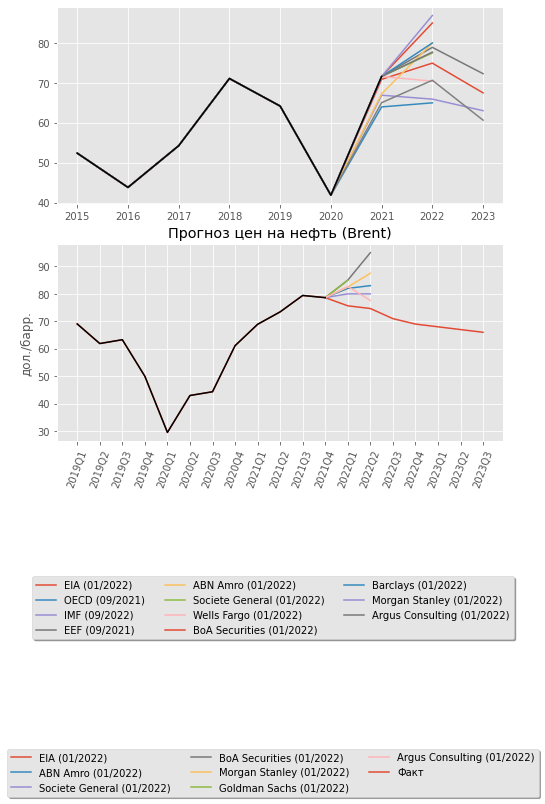

In [217]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

fig, (a13, a24) = plt.subplots(2,1,figsize=(8,8))

d1 = data.loc[:'2023',['EIA (01/2022)', 'OECD (09/2021)', 'IMF (09/2022)', 'EEF (09/2021)',
       'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
a13.plot(d1)

# plt.set_cmap('Greens')


a13.plot(data.loc[:'2023',['Консенсус-прогноз']], color='gray')
a13.plot(data.loc[:'2023',['Факт']], color='black')

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 

plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')





d12 = pd.read_csv('pricesMM.csv', index_col=0)
# plt.legend(loc=2)


# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

# d1 = data.loc[:'2023',['European Economic Forecast', 'EIA', 'OECD', 'IMF', 'ABN Amro ',
#        'Societe General', 'Wells Fargo', 'BoA Securities', 'Barclays',
#        'Morgan Stanley', 'Argus Consulting', 'Консенсус-прогноз', 'Факт']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
a24.plot(d12.iloc[:,:-1])
# a24.set

# a24.plot(d12.loc[:,['Консенсус-прогноз']], color='gray')
a24.plot(d12.loc[:,['Факт']], color='black')

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 
plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')

# plt.legend(d1.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=3)
plt.xticks(rotation=70)


fig.legend(d1.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)


fig.legend(d12.columns, loc='upper center', bbox_to_anchor=(0.5, -0.4),
          fancybox=True, shadow=True, ncol=3)



# plt.savefig('p16.png', dpi=800)
# 

# plt.savefig('p15.png', dpi=800)

In [469]:
data.columns


Index(['EIA (01/2022)', 'OECD (05/2021)', 'IMF (01/2022)', 'EEF (09/2021)',
       'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)', 'OPEC - Urals (02/2022)',
       'ЦБ РФ - Urals (базовый, 10/2021)',
       'МЭР РФ - Urals (базовый, 09/2021) ',
       'МЭР РФ - Urals (консервативный, 09/2021) ',
       'МЭР РФ - Urals (долгосрочный, 2018)  ',
       'NEB - Reference case (09/2020)', 'NEB - Evolving (09/2020)',
       'EIA - Long-Term  (09/2020)', 'Конcенсус - краткосрочный',
       'Конcенсус - долгосрочный', 'Факт', 'Факт -  Urals'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


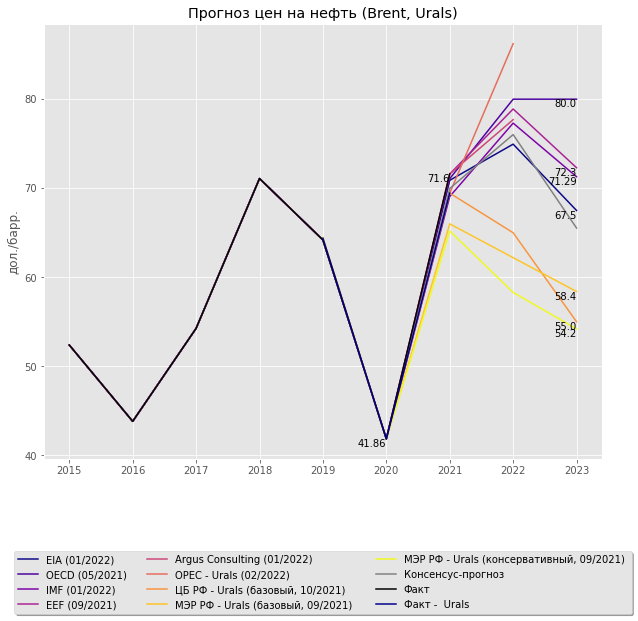

In [493]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

nnn = ['EIA (01/2022)', 'OECD (05/2021)', 'IMF (01/2022)', 'EEF (09/2021)',
       'Argus Consulting (01/2022)', 'OPEC - Urals (02/2022)',
       'ЦБ РФ - Urals (базовый, 10/2021)',
       'МЭР РФ - Urals (базовый, 09/2021) ',
       'МЭР РФ - Urals (консервативный, 09/2021) ']



# fig, (a13) = plt.subplots(1,1,figsize=(12,8))

d1 = data.loc[:'2023',['EIA (01/2022)', 'OECD (05/2021)', 'IMF (01/2022)', 'EEF (09/2021)',
       'Argus Consulting (01/2022)', 'OPEC - Urals (02/2022)',
       'ЦБ РФ - Urals (базовый, 10/2021)',
       'МЭР РФ - Urals (базовый, 09/2021) ',
       'МЭР РФ - Urals (консервативный, 09/2021) ']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
d1.plot(cmap='plasma', figsize=(10,8))

# plt.set_cmap('Greens')


plt.plot(data.loc[:'2023',['Конcенсус - краткосрочный']], color='gray')
plt.plot(data.loc[:'2023',['Факт']], color='black')
plt.plot(data.loc[:'2023',['Факт -  Urals']], color='darkblue')

# a13.plot(data.loc[:'2023',['Консенсус-прогноз']], color='gray')
# a13.plot(data.loc[:'2023',['Факт']], color='black')

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 

plt.title('Прогноз цен на нефть (Brent, Urals)')

plt.ylabel('дол./барр.')
plt.xlabel('')


# d1['Факт']
yr = 2020
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

# d1['Факт']o`
yr = 2021
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')


for yr in [2023]:
    for nam in nnn:
        plt.text(yr, d1[nam][yr], np.round(d1[nam][yr],2), verticalalignment='top', horizontalalignment='right')




plt.legend(['EIA (01/2022)', 'OECD (05/2021)', 'IMF (01/2022)', 'EEF (09/2021)',
       'Argus Consulting (01/2022)', 'OPEC - Urals (02/2022)',
       'ЦБ РФ - Urals (базовый, 10/2021)',
       'МЭР РФ - Urals (базовый, 09/2021) ',
       'МЭР РФ - Urals (консервативный, 09/2021) ', 
            'Консенсус-прогноз','Факт','Факт -  Urals' ], loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)



plt.savefig('p16.png', dpi=800)
# 

# plt.savefig('p15.png', dpi=800)

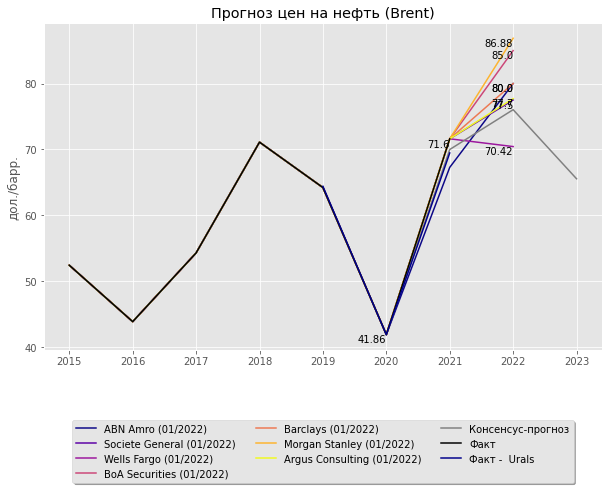

In [480]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

nnn = ['ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)']



# fig, (a13) = plt.subplots(1,1,figsize=(12,8))

d1 = data.loc[:'2023',[  'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
d1.plot(cmap='plasma', figsize=(4*2.5,3*2))

# plt.set_cmap('Greens')


plt.plot(data.loc[:'2023',['Конcенсус - краткосрочный']], color='gray')
plt.plot(data.loc[:'2023',['Факт']], color='black')
plt.plot(data.loc[:'2023',['Факт -  Urals']], color='darkblue')

# a13.plot(data.loc[:'2023',['Консенсус-прогноз']], color='gray')
# a13.plot(data.loc[:'2023',['Факт']], color='black')

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 

plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')


# d1['Факт']
yr = 2020
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')

# d1['Факт']o`
yr = 2021
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top', horizontalalignment='right')


for yr in [2022]:
    for nam in nnn:
        plt.text(yr, d1[nam][yr], np.round(d1[nam][yr],2), verticalalignment='top', horizontalalignment='right')




plt.legend(['ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)',
            'Консенсус-прогноз','Факт','Факт -  Urals' ], loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)



plt.savefig('p16_2.png', dpi=800)
# 

# plt.savefig('p15.png', dpi=800)

In [489]:
d12.columns


Index(['EIA (01/2022)', 'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'BoA Securities (01/2022)', 'Morgan Stanley (01/2022)',
       'Goldman Sachs (01/2022)', 'Argus Consulting (01/2022)', 'Факт'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


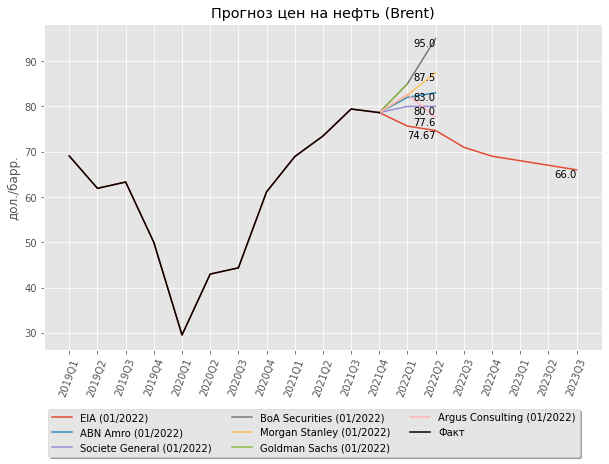

In [492]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))
nnn  =  ['EIA (01/2022)', 'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'BoA Securities (01/2022)', 'Morgan Stanley (01/2022)',
       'Goldman Sachs (01/2022)', 'Argus Consulting (01/2022)', 'Факт']

fig, (a24) = plt.subplots(1,1,figsize=(4*2.5,3*2))


d12 = pd.read_csv('pricesMM.csv', index_col=0)
# plt.legend(loc=2)


# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

# d1 = data.loc[:'2023',['European Economic Forecast', 'EIA', 'OECD', 'IMF', 'ABN Amro ',
#        'Societe General', 'Wells Fargo', 'BoA Securities', 'Barclays',
#        'Morgan Stanley', 'Argus Consulting', 'Консенсус-прогноз', 'Факт']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
a24.plot(d12.iloc[:,:-1])
# a24.set

# a24.plot(d12.loc[:,['Консенсус-прогноз']], color='gray')
a24.plot(d12.loc[:,['Факт']], color='black')

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 
plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')

# plt.legend(d1.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=3)
plt.xticks(rotation=70)


# # d1['Факт']
# yr = '2021Q4'
# nam = 'Факт'
# plt.text(yr, data.loc[yr,nam], dadata.loc[yr,nam], horizontalalignment='right')


for yr in ['2022Q2']:
    for nam in nnn:
        plt.text(yr, d12[nam][yr], np.round(d12[nam][yr],2), verticalalignment='top', horizontalalignment='right')

for yr in ['2023Q3']:
    for nam in nnn:
        plt.text(yr, d12[nam][yr], np.round(d12[nam][yr],2), verticalalignment='top', horizontalalignment='right')



fig.legend(d12.columns, loc='upper center', bbox_to_anchor=(0.5, -0),
          fancybox=True, shadow=True, ncol=3)



# plt.savefig('p16.png', dpi=800)
# 

# plt.savefig('p15.png', dpi=800)

In [246]:
data.columns

Index(['EIA (01/2022)', 'OECD (09/2021)', 'IMF (09/2022)', 'EEF (09/2021)',
       'ABN Amro (01/2022)', 'Societe General (01/2022)',
       'Wells Fargo (01/2022)', 'BoA Securities (01/2022)',
       'Barclays (01/2022)', 'Morgan Stanley (01/2022)',
       'Argus Consulting (01/2022)', 'NEB - Reference case (09/2020)',
       'NEB - Evolving (09/2020)', 'EIA - Long-Term  (09/2020)',
       'Консенсус-прогноз', 'Факт'],
      dtype='object')

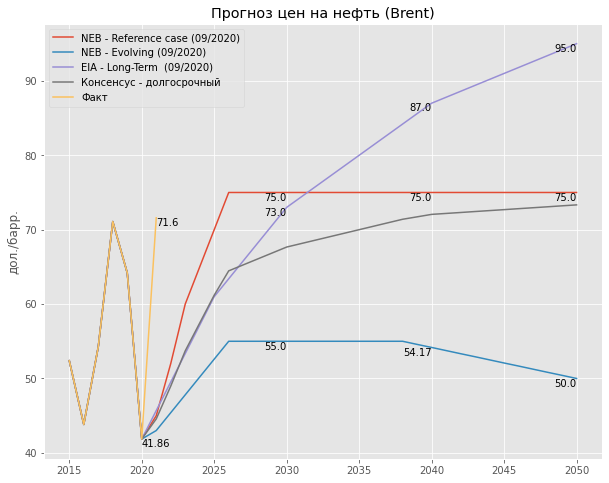

In [495]:
# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

d1 = data.loc[:,['NEB - Reference case (09/2020)',
       'NEB - Evolving (09/2020)', 'EIA - Long-Term  (09/2020)', 'Конcенсус - долгосрочный', 'Факт']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
d1.plot( figsize=(10,8))

# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 



# d1['Факт']
yr = 2020
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top')

# d1['Факт']
yr = 2021
nam = 'Факт'
plt.text(yr, data[nam][yr], data[nam][yr], verticalalignment='top')

nnn=['NEB - Reference case (09/2020)',
       'NEB - Evolving (09/2020)', 'EIA - Long-Term  (09/2020)']

for yr in [2030,2040,2050]:
    for nam in nnn:
        plt.text(yr, d1[nam][yr], np.round(d1[nam][yr],2), verticalalignment='top', horizontalalignment='right')


        
plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')

# plt.legend(d1.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=3)

plt.savefig('p17.png', dpi=800)

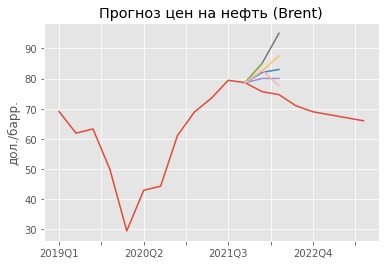

In [366]:
d1 = pd.read_csv('pricesMM.csv', index_col=0)
# plt.legend(loc=2)


# .plot()
# plt.legend(loc=2)
# plt.figure(figsize=(18, 6))

# d1 = data.loc[:'2023',['European Economic Forecast', 'EIA', 'OECD', 'IMF', 'ABN Amro ',
#        'Societe General', 'Wells Fargo', 'BoA Securities', 'Barclays',
#        'Morgan Stanley', 'Argus Consulting', 'Консенсус-прогноз', 'Факт']]
# d1.iloc[:,-2]=d1.iloc[:,-2].interpolate()
# .loc[:,['EIA', 'IEA', 'OECD', 'Конcенсус-прогноз', 'Факт']]
d1.plot(legend=None)
# d1.plot()

# plt.plot(d2, linestyle='', marker='o')

# plt.legend(None)

# plt.legend(loc=None)
# 
plt.title('Прогноз цен на нефть (Brent)')

plt.ylabel('дол./барр.')
plt.xlabel('')

# plt.legend(d1.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=3)

plt.savefig('p16.png', dpi=800)

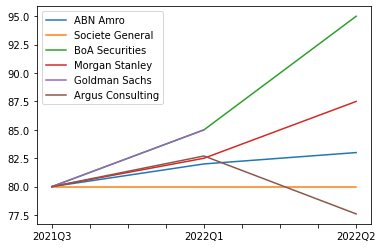

In [49]:
pd.read_csv('pricesMM.csv', index_col=0).plot()
plt.legend(loc=2)

<AxesSubplot:xlabel='Brent Crude Oil Price Forecasts, $ / bbl'>

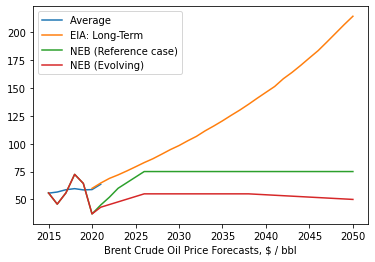

In [43]:
pd.read_csv('prices.csv', index_col=0).iloc[:,[0,2,5,6]].plot()

<AxesSubplot:xlabel='Oil Consumption (Million bbls per day)'>

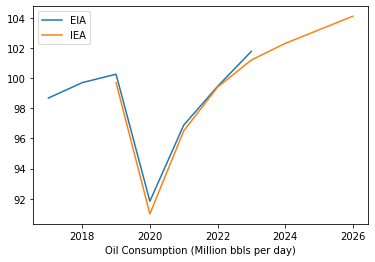

In [22]:
pd.read_csv('cons.csv', index_col=0).loc[:'2030','EIA':].plot()

<AxesSubplot:xlabel='Oil Consumption (Million bbls per day)'>

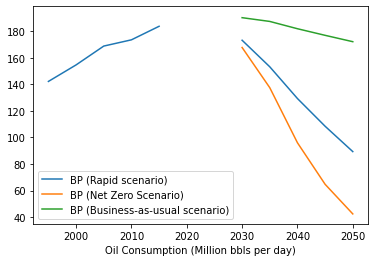

In [23]:
pd.read_csv('cons.csv', index_col=0).iloc[:,:3].plot()

Лучше, как у ребят по углю оформлять, посмотри в группе последнюю презентацию - первые слайды. 


IEA


Чистый нулевой уровень выбросов к 2050 г. 

Устанавливает путь для глобального энергетического сектора к достижению нулевых выбросов CO2 к 2050 году. Он не полагается на сокращение выбросов за пределами энергетического сектора для достижения этой цели.

Сценарий объявленной политики

Предполагает, что все климатические обязательства, взятые на себя правительствами всего мира, в том числе определяемые на национальном уровне вклады (NDC) и долгосрочные целевые показатели чистого нуля, будут выполнены полностью и своевременно.

Отражает, насколько нынешние обещания приближают мир к цели по ограничению глобального потепления до 1,5 °C, в нем подчеркивается «разрыв в амбициях», который необходимо закрыть для достижения целей, согласованных в Париже в 2015 году.


Сценарий заявленной политики (STEPS) 

Отражающий текущие действующие политики по секторам, а также тех, которые были объявлены правительствами по всему миру.

Обеспечивает ориентир для оценки потенциальных достижений (и ограничений) последних изменений в политике в области энергетики и климата.


Сценарий устойчивого развития

Комплексный сценарий, определяющий путь, направленный на: обеспечение всеобщего доступа к недорогим, надежным, устойчивым и современным энергетическим услугам к 2030 году; существенное снижение загрязнения воздуха; и принятие эффективных мер по борьбе с изменением климата.


---------------------------------------------------------------

BP

Сценарии не являются прогнозами того, что может произойти. Скорее, сценарии помогают проиллюстрировать диапазон возможных результатов в течение следующих тридцати лет, хотя неопределенность существенна, а сценарии не дают исчерпывающего описания всех возможных результатов. 


Быстрый переход (Rapid)

Содержит ряд политических мер, во главе которых стоит значительный рост цен на углеродные выбросы и которые поддерживаются более целенаправленными отраслевыми мерами, которые приводят к сокращению выбросов углерода в результате снижения использования энергии примерно на 70% к 2050 году. Это падение в выбросах соответствует сценариям, которые согласуются с ограничением повышения глобальной температуры к 2100 году значительно ниже 2 градусов по Цельсию сверх доиндустриального уровня. 

Нулевые выбросы (Net-zero)

Сценарий Net Zero (Net Zero) предполагает, что меры политики, воплощенные в Rapid, дополняются и усиливаются значительными изменениями в поведении и предпочтениях общества, которые еще больше ускоряют сокращение выбросов углерода. К 2050 году глобальные выбросы углерода в результате использования энергии сократятся более чем на 95%, что в целом соответствует целому ряду сценариев, которые согласуются с ограничением повышения температуры до 1,5 градусов по Цельсию.

Обычный бизнес (Business-as-usual)

Сценарий обычного развития событий (BAU) предполагает, что государственная политика, технологии и социальные предпочтения продолжают развиваться такими же темпами и темпами, как и в недавнем прошлом. Продолжение этого прогресса, хотя и относительно медленное, означает, что пик выбросов углерода придется на середину 2020-х годов. Несмотря на этот пик, достигнут незначительный прогресс в плане сокращения выбросов углерода в результате использования энергии: выбросы в 2050 году будут менее чем на 10% ниже уровня 2018 года. 

Спрос на первичную энергию увеличивается примерно на 10% в Rapid и Net Zero и примерно на 25% в BAU.

---------------------------------------------------------------

Total

Импульс (Momentum)

Основан на стратегиях декарбонизации стран Net-Zero 2050 (NZ 2050), при этом Китай находится на пути к достижению углеродной нейтральности к 2060 г. 
С учетом объявленных целей и ОНУВ (Определяемые на национальном уровне вклады) других стран ожидается повышение температуры на 2,2-2,4°C в 2100 г.

Разрыв (Rupture)

Достижение целевого показателя Парижского соглашения значительно ниже 2 °C на основе сценариев выбросов Межправительственная группа экспертов по изменению климата (IPCC). Предполагает серьезные сдвиги в государственной политике стран, не входящих в состав NZ 2050, широкомасштабные достижения в области экологически чистых технологий и восстановление новой энергетической системы в глобальном масштабе.
Повышение температуры ограничено 1,7∘C. 

---------------------------------------------------------------

Лукойл

Эволюция (Климатческие риски - высокие, инфляция - низкая, доступность энергии - высокая)

- Приоритет экономического развития и снижения энергетического неравенства

- Ограничение выбросов парниковых газов в рамках объявленных национальных целейпо сокращению эмиссий и существующих технологических возможностей

- Умеренная скорость структурных изменений на энергетических рынках

Равновесие (Климатческие риски, инфляция, доступность энергии - умеренные)

- Баланс между достижением климатических целей и развитием экономики

- Достижение цели Парижского соглашения по удержанию роста глобальной температуры ниже 2°C

- Консолидация международных усилий для достижения целей устойчивого развития

Транформация (Климатческие риски - низкие, инфляция - высокая, доступность энергии - низкая)

- Фокус на климатических целях
- Беспрецедентный уровень международного сотрудничества и отсутствие ограничений на финансирование климатических проектов
- Радикальная трансформация мировой энергетики и промышленности
- Углеродная нейтральность ведущих экономик к 2050 год










